<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/Apriori_FPGrowth_Assignment/Apriori_and_FPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 



*   Apriori
*   FP Growth

**Dataset used** : Groceries data 



## **install and import libraries** 


In [ ]:
 pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6bffb1733df9fbae0d8adbb572aa0e3de595815b89e8f2fe8cb8173a4993a6a5
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
import sys
!{sys.executable} -m pip install apyori

Once `apyori` is installed, then load the libraries below.

In [ ]:
import pandas as pd              
import matplotlib.pyplot as plt  
from apyori import apriori       

In [ ]:
# load groceries data
groceries_data = pd.read_csv('/content/sample_data/Groceries.csv')
groceries_data

,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,NaN.10,NaN.11,NaN.12,NaN.13,NaN.14,NaN.15,NaN.16,NaN.17,NaN.18,NaN.19,NaN.20,NaN.21,NaN.22,NaN.23,NaN.24,NaN.25,NaN.26,NaN.27
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9830,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
groceries = []
with open('/content/sample_data/Groceries.csv') as f:
    for line in f:
        grocery = [item for item in line.strip().split(',') if item != 'NaN']
        groceries.append(grocery)
    
groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

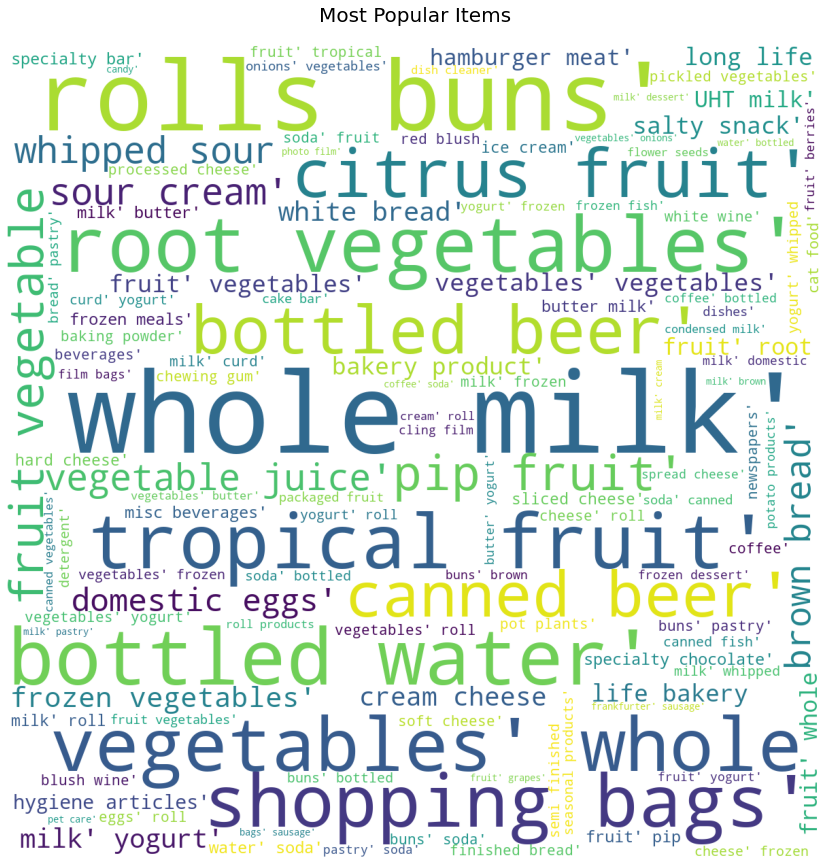

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(groceries))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

## APRIORI



In [ ]:
freq_items = list(apriori(groceries, min_support=0.001, min_confidence=0.10,   min_length=2, max_length=2))
freq_items[0]

RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)])

In [ ]:
freq_items_df = pd.DataFrame([{'From': list(freq_item[0])[0], 'To': list(freq_item[0])[1], 'Support': freq_item[1], 'Confidence': freq_item[2][0][2], 'Lift': freq_item[2][0][3]} for freq_item in freq_items if len(freq_item[0]) == 2])
    
freq_items_df = freq_items_df.dropna()

freq_items_df.head()  
  
    


,From,To,Support,Confidence,Lift
0,bottled water,Instant food products,0.001017,0.126582,1.145296
1,butter,Instant food products,0.001220,0.151899,2.741145
2,citrus fruit,Instant food products,0.001118,0.139241,1.682347
3,curd,Instant food products,0.001322,0.164557,3.088583
4,domestic eggs,Instant food products,0.001017,0.126582,1.995091


**List Rules**

In [ ]:
# get the top rules
freq_items_df = freq_items_df.sort_values('Support', ascending=False).head(50)

items = set(freq_items_df['From']) | set(freq_items_df['To'])

# map all the items 
imap = {item : i for i, item in enumerate(items)}

# add from n and to n column in the dataframe 
freq_items_df['FromN'] = freq_items_df['From'].map(imap)
freq_items_df['ToN'] = freq_items_df['To'].map(imap)

# top association rules
freq_items_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
1539,whole milk,other vegetables,0.074835,0.386758,1.513634,2,19
1744,rolls/buns,whole milk,0.056634,0.307905,1.205032,21,2
1929,whole milk,yogurt,0.056024,0.219260,1.571735,2,11
1769,whole milk,root vegetables,0.048907,0.448694,1.756031,2,16
1506,root vegetables,other vegetables,0.047382,0.244877,2.246605,16,19
1540,other vegetables,yogurt,0.043416,0.224383,1.608457,19,11
1505,rolls/buns,other vegetables,0.042603,0.220179,1.197047,21,19
1911,whole milk,tropical fruit,0.042298,0.403101,1.577595,2,5
1864,soda,whole milk,0.040061,0.229738,0.899112,12,2
1725,soda,rolls/buns,0.038332,0.208402,1.195124,12,21


Text(0, 0.5, 'Support')

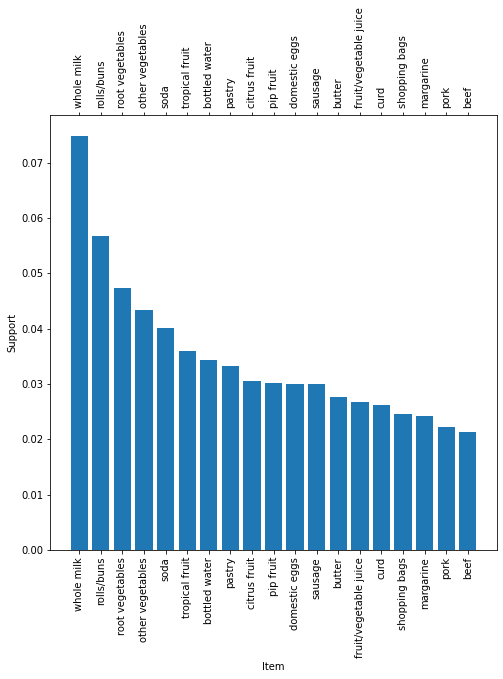

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.bar(freq_items_df.From, freq_items_df.Support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

## FP GROWTH

In [ ]:
from mlxtend.preprocessing import TransactionEncoder  
from mlxtend.frequent_patterns import association_rules        

In [ ]:
freq_items_df

,From,To,Support,Confidence,Lift,FromN,ToN
1539,whole milk,other vegetables,0.074835,0.386758,1.513634,2,19
1744,rolls/buns,whole milk,0.056634,0.307905,1.205032,21,2
1929,whole milk,yogurt,0.056024,0.219260,1.571735,2,11
1769,whole milk,root vegetables,0.048907,0.448694,1.756031,2,16
1506,root vegetables,other vegetables,0.047382,0.244877,2.246605,16,19
1540,other vegetables,yogurt,0.043416,0.224383,1.608457,19,11
1505,rolls/buns,other vegetables,0.042603,0.220179,1.197047,21,19
1911,whole milk,tropical fruit,0.042298,0.403101,1.577595,2,5
1864,soda,whole milk,0.040061,0.229738,0.899112,12,2
1725,soda,rolls/buns,0.038332,0.208402,1.195124,12,21


In [ ]:

df_set = freq_items_df.groupby(['From', 'To']).To.count().unstack().reset_index().fillna(0).set_index('From')
df_set

frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)
frequent_itemsets



,support,itemsets
0,0.105263,(bottled water)
1,0.052632,(brown bread)
2,0.052632,(newspapers)
3,0.684211,(other vegetables)
4,0.052632,(rolls/buns)
...,...,...
330,0.052632,"(whole milk, sausage, shopping bags, other veg..."
331,0.052632,"(whole milk, root vegetables, sausage, tropica..."
332,0.052632,"(bottled water, whole milk, sausage, shopping ..."
333,0.052632,"(bottled water, whole milk, root vegetables, s..."


In [ ]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(other vegetables),0.105263,0.684211,0.105263,1.0,1.461538,0.033241,inf
1,(rolls/buns),(bottled water),0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
2,(bottled water),(rolls/buns),0.105263,0.052632,0.052632,0.5,9.500000,0.047091,1.894737
3,(bottled water),(root vegetables),0.105263,0.105263,0.052632,0.5,4.750000,0.041551,1.789474
4,(root vegetables),(bottled water),0.105263,0.105263,0.052632,0.5,4.750000,0.041551,1.789474
...,...,...,...,...,...,...,...,...,...
5023,(root vegetables),"(brown bread, tropical fruit, other vegetables...",0.105263,0.052632,0.052632,0.5,9.500000,0.047091,1.894737
5024,(tropical fruit),"(root vegetables, brown bread, other vegetable...",0.105263,0.052632,0.052632,0.5,9.500000,0.047091,1.894737
5025,(brown bread),"(root vegetables, tropical fruit, other vegeta...",0.052632,0.052632,0.052632,1.0,19.000000,0.049861,inf
5026,(whipped/sour cream),"(root vegetables, tropical fruit, brown bread,...",0.105263,0.052632,0.052632,0.5,9.500000,0.047091,1.894737


In [ ]:
top_rules = rules.sort_values('confidence', ascending = False)[:10]
top_rules[(top_rules['lift'] >= 1.2) &
(top_rules['confidence'] >= 0.5) & (top_rules['support'] >=0.5)]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(other vegetables),0.105263,0.684211,0.105263,1.0,1.461538,0.033241,inf
3066,"(tropical fruit, yogurt, root vegetables, news...",(whipped/sour cream),0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
3068,"(yogurt, newspapers, tropical fruit, whipped/s...",(root vegetables),0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
3069,"(tropical fruit, root vegetables, whipped/sour...","(newspapers, yogurt)",0.052632,0.052632,0.052632,1.0,19.000000,0.049861,inf
3070,"(tropical fruit, root vegetables, newspapers)","(yogurt, whipped/sour cream)",0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
3072,"(newspapers, root vegetables, whipped/sour cream)","(tropical fruit, yogurt)",0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
3073,"(yogurt, root vegetables, whipped/sour cream)","(tropical fruit, newspapers)",0.052632,0.052632,0.052632,1.0,19.000000,0.049861,inf
3074,"(yogurt, root vegetables, newspapers)","(tropical fruit, whipped/sour cream)",0.052632,0.052632,0.052632,1.0,19.000000,0.049861,inf
3075,"(newspapers, tropical fruit, whipped/sour cream)","(root vegetables, yogurt)",0.052632,0.105263,0.052632,1.0,9.500000,0.047091,inf
3076,"(yogurt, tropical fruit, whipped/sour cream)","(root vegetables, newspapers)",0.052632,0.052632,0.052632,1.0,19.000000,0.049861,inf


**Conclusion**


other vegetables , whipped/sour cream, yogurt , root vegetables , tropical fruit are frequently bought together